<a href="https://colab.research.google.com/github/jiackylee/rfm/blob/main/RFM_using_quartiles_and_jenks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jenkspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.3/611.3 kB 5.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from scipy import stats
import jenkspy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
url  = 'https://drive.google.com/uc?id=1Ieyjmra5AoQ_IHv1-KE4VpAVVN4tFnJf'
df = pd.read_csv(url)

In [36]:
df.head(5)

,Order ID,Order Date,Customer ID,Region,Product ID,Quantity,Sales
0,MX-2014-143658,2/10/2014,SC-20575,North,OFF-LA-10002782,3,13.08
1,MX-2012-155047,10/15/2012,KW-16570,South,FUR-FU-10004015,8,252.16
2,MX-2012-155047,10/15/2012,KW-16570,South,FUR-BO-10002352,2,193.28
3,MX-2012-155047,10/15/2012,KW-16570,South,OFF-BI-10004428,4,35.44
4,MX-2012-155047,10/15/2012,KW-16570,South,OFF-AR-10004594,2,71.60


In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [39]:
currentDate = dt.datetime(2015,1,1)

In [40]:
rfm = df.groupby('Customer ID').agg({'Order Date': lambda x: (currentDate - x.max()).days,
                                    'Order ID': lambda x: len(x),
                                    'Sales': lambda x: x.sum()})

In [41]:
rfm.head(10)

,Order Date,Order ID,Sales
Customer ID,,,
AA-10315,9,42,15578.04
AA-10375,7,42,7272.89
AA-10480,118,38,18467.63
AA-10645,27,73,16691.92
AA-315,3,8,2499.63
AA-375,182,13,744.12
AA-480,315,10,2235.63
AA-645,82,18,3263.52
AB-10015,17,77,24361.17


In [9]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1590 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  1590 non-null   int64  
 1   Order ID    1590 non-null   int64  
 2   Sales       1590 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 49.7+ KB


In [42]:
# rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [43]:
rfm.head(5)

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,9,42,15578.04
AA-10375,7,42,7272.89
AA-10480,118,38,18467.63
AA-10645,27,73,16691.92
AA-315,3,8,2499.63


In [62]:
rfm['r_percentile'] = rfm['Recency'].rank(pct=True,ascending=False)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], 4, labels=range(4,0,-1))

rfm['f_percentile'] = rfm['Frequency'].rank(pct=True,ascending=True)
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 4, labels=range(4,0,-1))

rfm['m_percentile'] = rfm['Monetary'].rank(pct=True,ascending=True)
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 4, labels=range(4,0,-1))

In [46]:
rfm.head(5)

,Recency,Frequency,Monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
Customer ID,,,,,,,,,
AA-10315,9,42,15578.04,0.826101,1,0.610063,2,0.760377,1
AA-10375,7,42,7272.89,0.868239,1,0.610063,2,0.496855,3
AA-10480,118,38,18467.63,0.213522,4,0.563836,2,0.850943,1
AA-10645,27,73,16691.92,0.609434,2,0.979560,1,0.793082,1
AA-315,3,8,2499.63,0.937421,1,0.123899,4,0.299371,3


In [61]:
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

In [50]:
rfm.head(5)

,Recency,Frequency,Monetary,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,rfm_score
Customer ID,,,,,,,,,,
AA-10315,9,42,15578.04,0.826101,1,0.610063,2,0.760377,1,121
AA-10375,7,42,7272.89,0.868239,1,0.610063,2,0.496855,3,123
AA-10480,118,38,18467.63,0.213522,4,0.563836,2,0.850943,1,421
AA-10645,27,73,16691.92,0.609434,2,0.979560,1,0.793082,1,211
AA-315,3,8,2499.63,0.937421,1,0.123899,4,0.299371,3,143


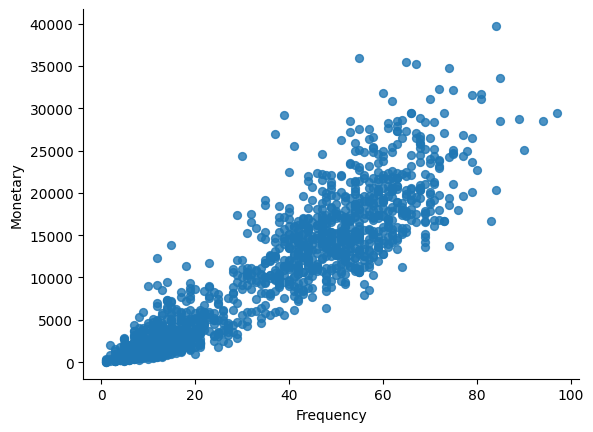

In [16]:
# @title Frequency vs Monetary

from matplotlib import pyplot as plt
rfm.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

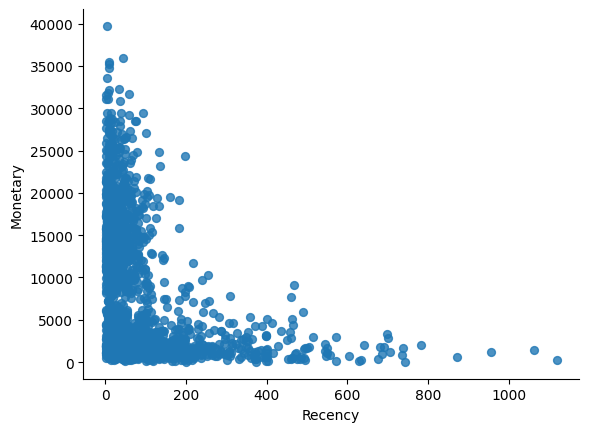

In [17]:
# @title Recency vs Monetary

from matplotlib import pyplot as plt
rfm.plot(kind='scatter', x='Recency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

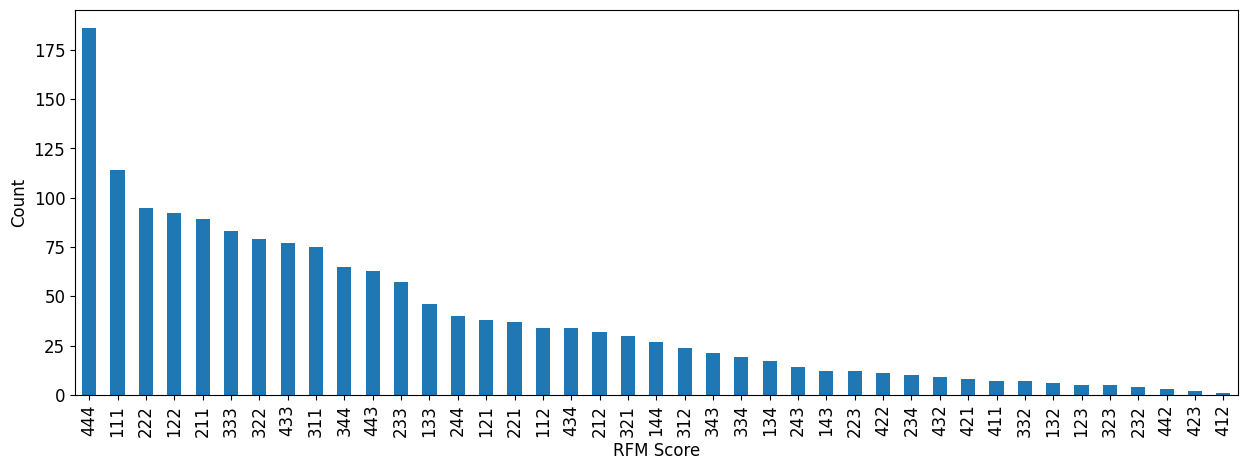

In [18]:
ax = rfm['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [51]:
r_quarters = rfm['Recency'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
f_quarters = rfm['Frequency'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
m_quarters = rfm['Monetary'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), columns=['Q_Recency', 'Q_frequency', 'Q_Monetary'], index = ['min', 'first_part','second_part','third_part', 'max'])
quartile_spread

,Q_Recency,Q_frequency,Q_Monetary
min,1.0,1.0,23.910
first_part,15.0,12.0,2014.170
second_part,41.0,28.0,7451.560
third_part,104.0,52.0,15316.845
max,1119.0,97.0,39718.990


In [52]:
r_breaks = jenkspy.jenks_breaks(rfm['Recency'], n_classes=4)
f_breaks = jenkspy.jenks_breaks(rfm['Frequency'], n_classes=4)
m_breaks = jenkspy.jenks_breaks(rfm['Monetary'], n_classes=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)),
                      columns=['J_Recency','J_Frequency', 'J_Monetary'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
jenks_spread

,J_Recency,J_Frequency,J_Monetary
min,1,1,23.91
first_part,84,24,6587.25
second_part,252,44,13859.07
third_part,516,60,21075.61
max,1119,97,39718.99


In [60]:
df = pd.concat([quartile_spread, jenks_spread], axis=1)
cols = ['Q_Recency', 'Q_frequency', 'Q_Monetary', 'J_Recency', 'J_Frequency', 'J_Monetary']
df[cols]

,Q_Recency,Q_frequency,Q_Monetary,J_Recency,J_Frequency,J_Monetary
min,1.0,1.0,23.910,1,1,23.91
first_part,15.0,12.0,2014.170,84,24,6587.25
second_part,41.0,28.0,7451.560,252,44,13859.07
third_part,104.0,52.0,15316.845,516,60,21075.61
max,1119.0,97.0,39718.990,1119,97,39718.99


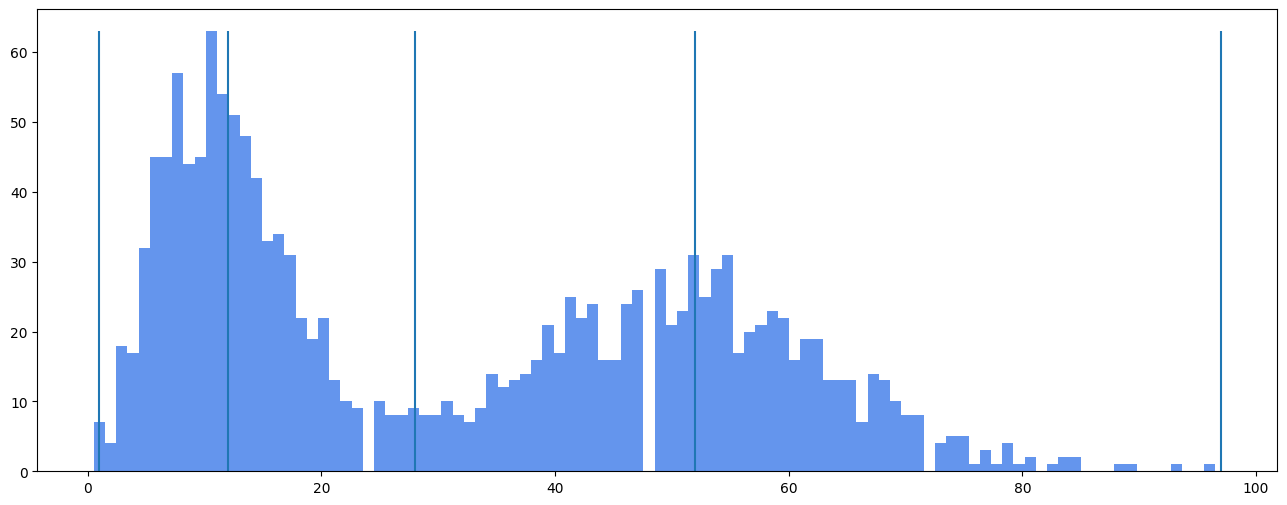

In [54]:
plt.figure(figsize = (16,6))
hist = plt.hist(rfm['Frequency'], bins=100,align='left', color='cornflowerblue')
for q in f_quarters:
    plt.vlines(q, ymin=0, ymax = max(hist[0]))

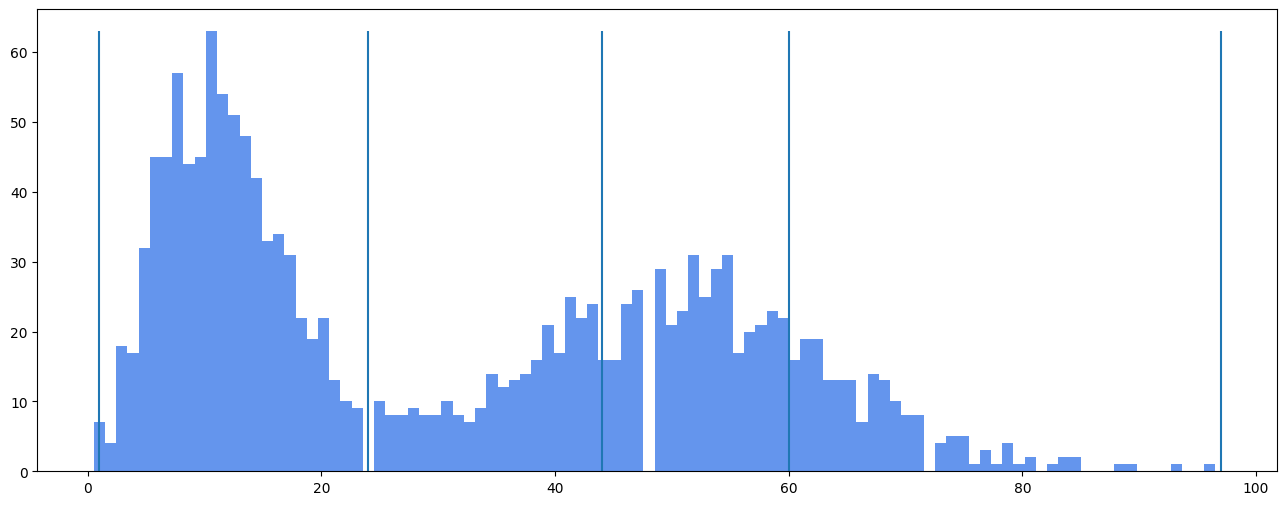

In [55]:
plt.figure(figsize = (16,6))
hist = plt.hist(rfm['Frequency'], bins=100,align='left', color='cornflowerblue')
for b in f_breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [56]:
# Crediting camdenl with this function
# https://stats.stackexchange.com/users/27263/camdenl?tab=profile

def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, n_classes=classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

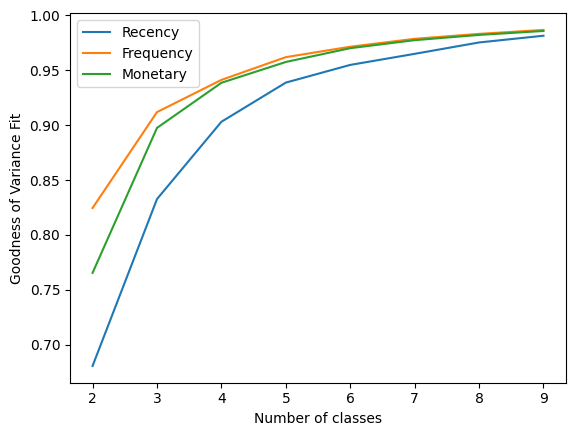

In [57]:
my_dict = {}
for col in rfm.columns[:3]:
    results = []
    for i in range(2, 10):
        results.append(goodness_of_variance_fit(rfm[col], i))
    my_dict[col] = results
plt.plot(range(2, 10), my_dict['Recency'], label='Recency')
plt.plot(range(2, 10), my_dict['Frequency'], label='Frequency')
plt.plot(range(2, 10), my_dict['Monetary'], label='Monetary')
plt.xlabel('Number of classes')
plt.ylabel('Goodness of Variance Fit')
plt.legend(loc='best')
plt.show()

In [63]:
breaks_list = [r_breaks, f_breaks, m_breaks]

rfm['r_j_score'] = pd.cut(rfm['Recency'], bins=r_breaks, labels=[1, 2, 3, 4], include_lowest=True)
rfm['f_j_score'] = pd.cut(rfm['Frequency'], bins=f_breaks, labels=[4, 3, 2, 1], include_lowest=True)
rfm['m_j_score'] = pd.cut(rfm['Monetary'], bins=m_breaks, labels=[4, 3, 2, 1], include_lowest=True)

rfm.drop(['r_percentile', 'f_percentile', 'm_percentile'], axis=1, inplace=True)
rfm.head(5)

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,r_j_score,f_j_score,m_j_score
Customer ID,,,,,,,,,,
AA-10315,9,42,15578.04,1,2,1,121,1,3,2
AA-10375,7,42,7272.89,1,2,3,123,1,3,3
AA-10480,118,38,18467.63,4,2,1,421,2,3,2
AA-10645,27,73,16691.92,2,1,1,211,1,1,2
AA-315,3,8,2499.63,1,4,3,143,1,4,4


In [64]:
rfm['rfm_j_score'] = rfm['r_j_score'].astype(str) + rfm['f_j_score'].astype(str) + rfm['m_j_score'].astype(str)

In [65]:
rfm.head(5)

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,r_j_score,f_j_score,m_j_score,rfm_j_score
Customer ID,,,,,,,,,,,
AA-10315,9,42,15578.04,1,2,1,121,1,3,2,132
AA-10375,7,42,7272.89,1,2,3,123,1,3,3,133
AA-10480,118,38,18467.63,4,2,1,421,2,3,2,232
AA-10645,27,73,16691.92,2,1,1,211,1,1,2,112
AA-315,3,8,2499.63,1,4,3,143,1,4,4,144


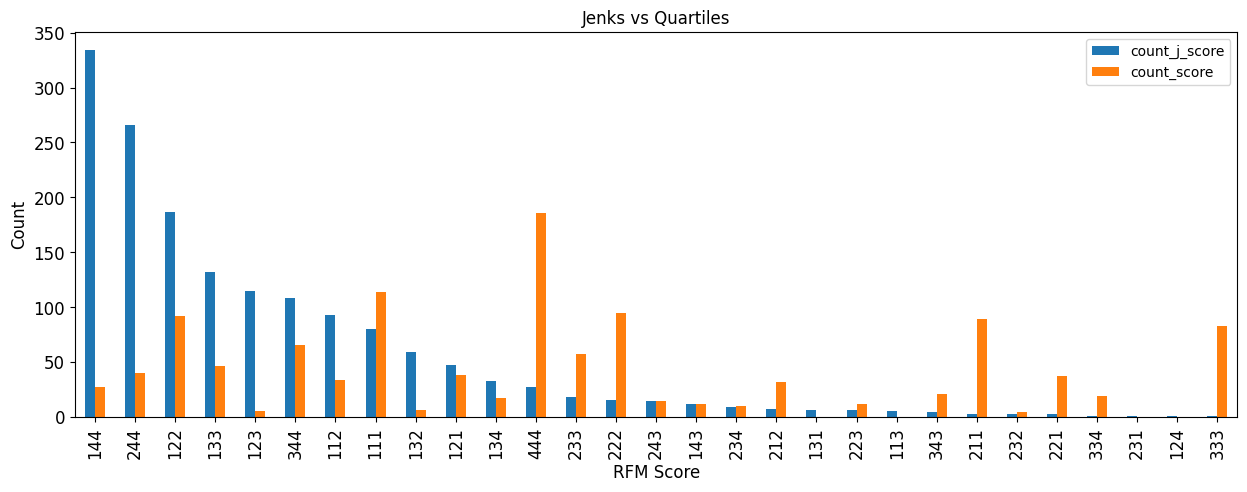

In [68]:
df = rfm['rfm_j_score'].value_counts().to_frame().join(rfm['rfm_score'].value_counts(), lsuffix='_j_score', rsuffix='_score')
ax = df.plot(kind='bar', title ="Jenks vs Quartiles", figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [69]:
!pip install HDBSCAN

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.0 MB/s eta 0:00:00


In [70]:
import hdbscan

In [71]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30,min_samples=12, metric='euclidean')

In [72]:
clusterer.fit(rfm[['Recency', 'Frequency', 'Monetary']])

HDBSCAN(min_cluster_size=30, min_samples=12)

In [73]:
rfm['Cluster'] = pd.Series(clusterer.labels_, index=rfm.index)

In [74]:
rfm.head(5)

,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm_score,r_j_score,f_j_score,m_j_score,rfm_j_score,Cluster
Customer ID,,,,,,,,,,,,
AA-10315,9,42,15578.04,1,2,1,121,1,3,2,132,1
AA-10375,7,42,7272.89,1,2,3,123,1,3,3,133,1
AA-10480,118,38,18467.63,4,2,1,421,2,3,2,232,1
AA-10645,27,73,16691.92,2,1,1,211,1,1,2,112,1
AA-315,3,8,2499.63,1,4,3,143,1,4,4,144,3


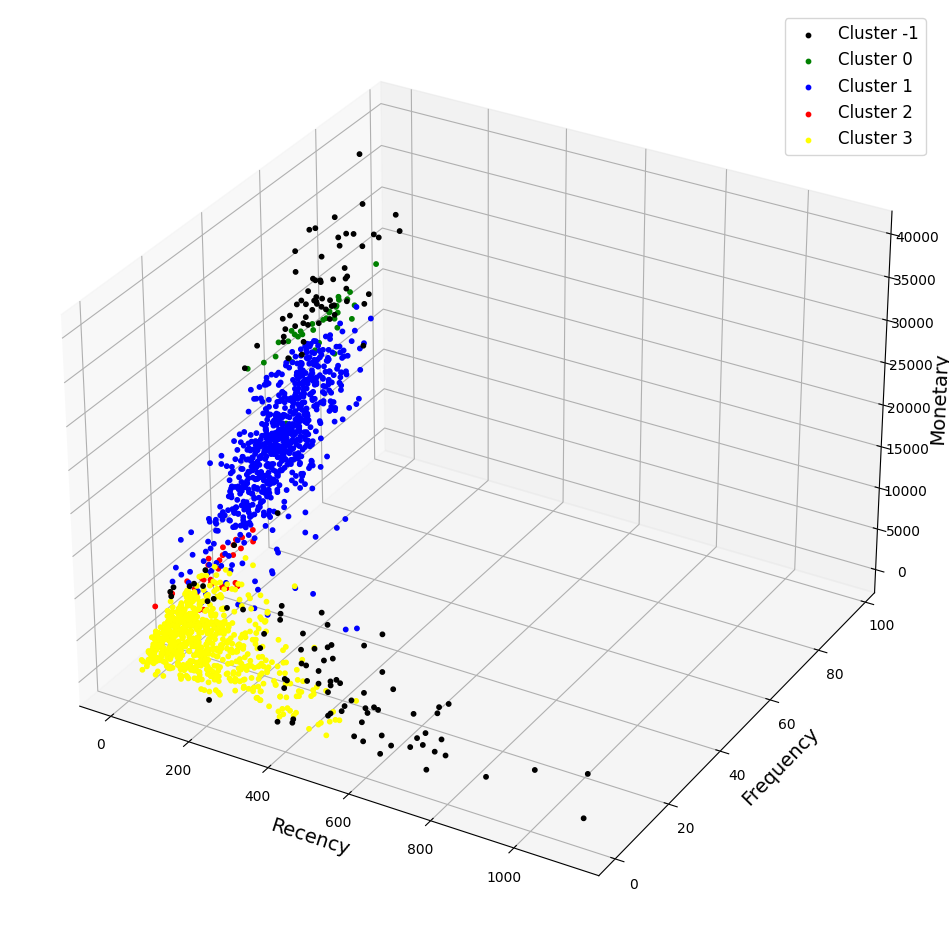

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(18,12))
dx = fig.add_subplot(111, projection='3d')
colors = ['green', 'blue', 'red', 'yellow', 'black']
#colors = [k for k in mclolors.CSS4_COLORS ]

for i in range(-1,len(rfm['Cluster'].unique())-1):
    dx.scatter(rfm[rfm.Cluster == i].Recency,
              rfm[rfm.Cluster == i].Frequency,
               rfm[rfm.Cluster ==i].Monetary,
               c = colors[i],
               label = 'Cluster ' + str(i),
               s=10, alpha=1.0)
dx.set_xlabel('Recency', fontsize=14)
dx.set_ylabel('Frequency', fontsize=14)
dx.set_zlabel('Monetary', fontsize=14)
dx.legend(fontsize=12)

In [76]:
pd.Series(clusterer.labels_).value_counts()

,count
1,715
3,667
-1,142
0,34
2,32


In [77]:
myDict = {}
for i in range(0, len(rfm['Cluster'].unique())-1):
    clust = rfm[rfm['Cluster'] == i]
    myDict['Cluster ' + str(i)] = [int(round(clust['Recency'].mean(),0)),
                            int(round(clust['Frequency'].mean(),0)),
                            int(round(clust['Monetary'].mean(),0)),
                            int(round(clust['Recency'].median(),0)),
                            int(round(clust['Frequency'].median(),0)),
                            int(round(clust['Monetary'].median(),0))]

df = pd.DataFrame.from_dict(myDict, orient='index',
                            columns=['mean_Recency','mean_Frequency', 'mean_Monetary',
                                    'median_Recency','median_Frequency', 'median_Monetary'])
df

,mean_Recency,mean_Frequency,mean_Monetary,median_Recency,median_Frequency,median_Monetary
Cluster 0,35,63,24590,24,62,24639
Cluster 1,38,49,14642,24,50,14614
Cluster 2,40,25,5808,35,23,5807
Cluster 3,111,12,2079,86,12,1889


In [78]:
rfm['rfm_j_score'] = rfm['r_j_score'].astype(str) + rfm['f_j_score'].astype(str) + rfm['m_j_score'].astype(str)

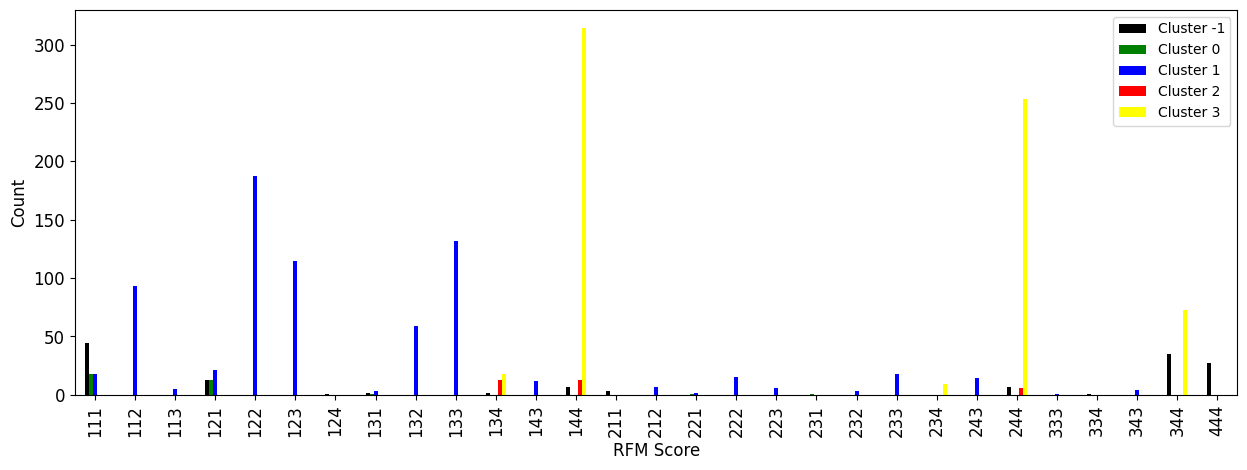

In [79]:
myDict = {}
for i in range(-1, len(rfm['Cluster'].unique())-1):
    clust = rfm[rfm['Cluster'] == i]
    myDict["Cluster " + str(i)] = clust['rfm_j_score'].value_counts()
df = pd.DataFrame.from_dict(myDict)

colors = ['black', 'green', 'blue', 'red', 'yellow']
ax = df.plot(kind='bar', figsize=(15, 5), legend=True, fontsize=12, color=colors)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

Mean Squared Error: 9227705.547955275
R-squared: 0.8542235620663211


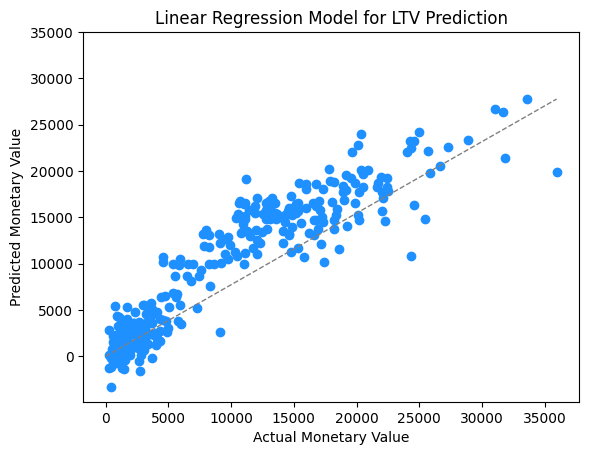

In [85]:
# prompt: predicting ltv withLinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'rfm' DataFrame is already prepared with 'Cluster' and 'Monetary' columns

# Prepare data for linear regression
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also plot the predicted vs. actual values to visualize the model's performance.
plt.scatter(y_test, y_pred, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='gray', lw=1, linestyle='--')

ticks = range(0, 35001, 5000)
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("Linear Regression Model for LTV Prediction")
plt.show()

In [86]:
# prompt: using f1 to score the model

from sklearn.metrics import f1_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# You need to adjust this based on how your model generates predictions.
# For example, if you're doing classification, you might have a threshold for predicting
# a specific class (e.g., customer segment).

# Convert predictions to binary classification (e.g., high LTV vs. low LTV)
# y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred]

# Calculate F1 score
# f1 = f1_score(y_test, y_pred_binary)
# print("F1 Score:", f1)

# Example with a hypothetical threshold for classification
threshold = 10000  # Adjust based on your model and needs

y_pred_binary = [1 if pred > threshold else 0 for pred in y_pred]
y_test_binary = [1 if val > threshold else 0 for val in y_test]

f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score:", f1)

F1 Score: 0.9449838187702265


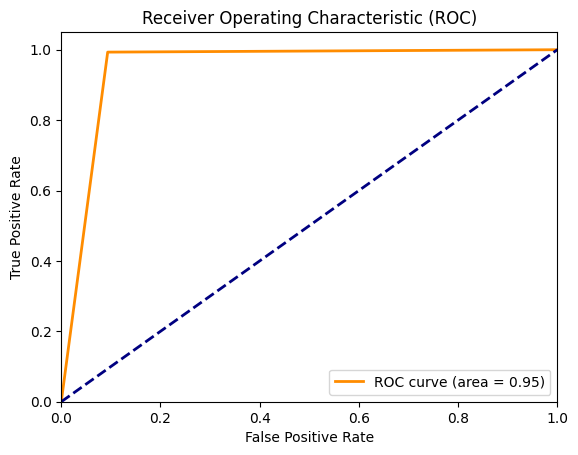

In [87]:
# prompt: ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels (e.g., 0 or 1 for binary classification)
# and y_pred_proba contains the predicted probabilities for the positive class.

# If you have multiple classes, you need to binarize y_test using label_binarize
# y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) # Example for 3 classes


# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

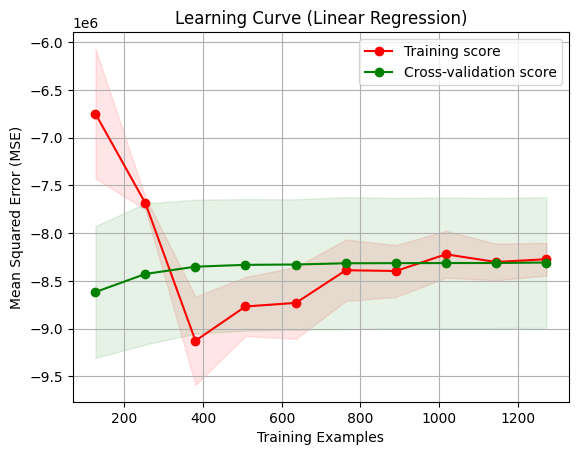

In [88]:
# prompt: Learning Cure

# Assuming you want to analyze the learning curve for the linear regression model
# that predicts Monetary value based on Frequency, Recency, and Cluster.


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),  # Your model
    X=X,  # Your feature data (Frequency, Recency, Cluster)
    y=y,  # Your target variable (Monetary)
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary the training set size
    cv=5,  # Use 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE for evaluation
    n_jobs=-1  # Use all available CPU cores for faster computation
)


# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Linear Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Mean Squared Error: 20408578.23360551
R-squared: 0.6775915938447927


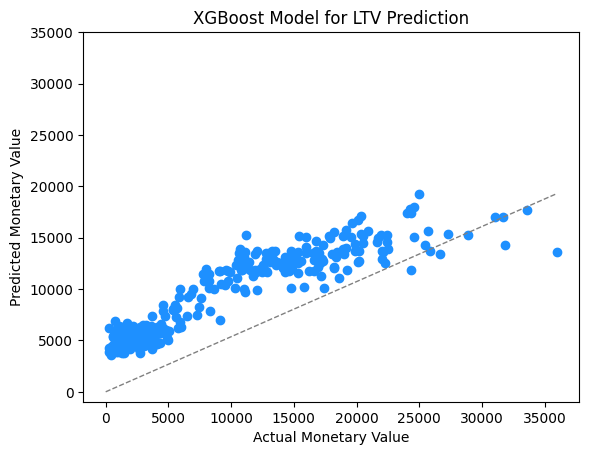

In [89]:
# prompt: Using XGBoost Predicting CLV

# Assuming 'rfm' DataFrame is already prepared with 'Cluster', 'Frequency', 'Recency', and 'Monetary' columns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for XGBoost
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also plot the predicted vs. actual values to visualize the model's performance.
plt.scatter(y_test, y_pred, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='gray', lw=1, linestyle='--')

ticks = range(0, 35001, 5000)
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("XGBoost Model for LTV Prediction")
plt.show()

# You can further improve the model by tuning hyperparameters using techniques like GridSearchCV.

Mean Squared Error: 65083353.98660444
R-squared: -0.02816669470410349


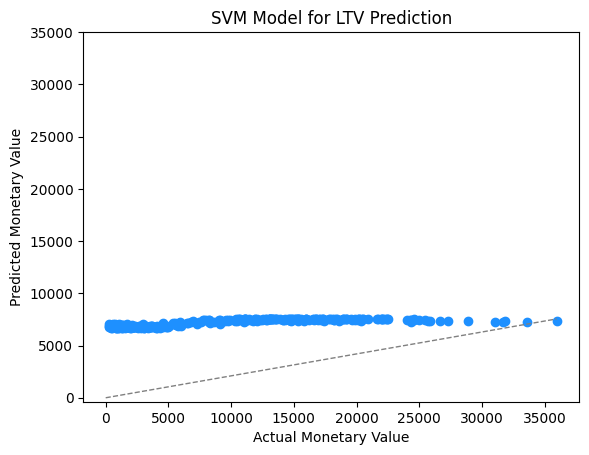

In [91]:
# prompt: Predicting LTV with SVM

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Assuming 'rfm' DataFrame is already prepared with 'Cluster', 'Frequency', 'Recency', and 'Monetary' columns

# Prepare data for SVM
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model (using SVR for regression)
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # You can adjust kernel, C, and epsilon
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also plot the predicted vs. actual values to visualize the model's performance.
plt.scatter(y_test, y_pred, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='gray', lw=1, linestyle='--')

ticks = range(0, 35001, 5000)
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("SVM Model for LTV Prediction")
plt.show()

# You can further improve the model by tuning hyperparameters using techniques like GridSearchCV.

Mean Squared Error: 8964614.994973402
R-squared: 0.8583797852431863


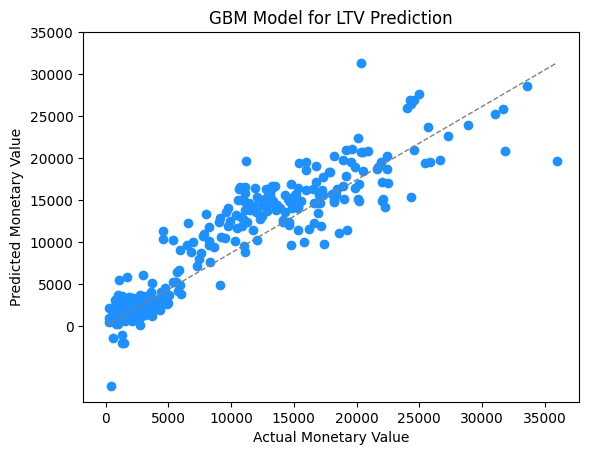

In [92]:
# prompt: Predicting LTV with GBM

# Assuming 'rfm' DataFrame is already prepared with 'Cluster', 'Frequency', 'Recency', and 'Monetary' columns

# Prepare data for GBM (Gradient Boosting Machine)
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the GBM model (using XGBoost as an example)
model = xgb.XGBRegressor(objective='reg:squarederror',
                         colsample_bytree=0.3,
                         learning_rate=0.1,
                         max_depth=5,
                         alpha=10,
                         n_estimators=100)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# You can also plot the predicted vs. actual values to visualize the model's performance.
plt.scatter(y_test, y_pred, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='gray', lw=1, linestyle='--')

ticks = range(0, 35001, 5000)
plt.xticks(ticks)
plt.yticks(ticks)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("GBM Model for LTV Prediction")
plt.show()

# You can further improve the model by tuning hyperparameters using techniques like GridSearchCV.

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 142966048.0000 - mae: 8953.8184 - val_loss: 143896368.0000 - val_mae: 9126.4180
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151622064.0000 - mae: 9297.1182 - val_loss: 143852576.0000 - val_mae: 9124.3125
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 149471936.0000 - mae: 9216.9648 - val_loss: 143740368.0000 - val_mae: 9119.5576
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155433664.0000 - mae: 9372.1885 - val_loss: 143513472.0000 - val_mae: 9110.3057
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153573456.0000 - mae: 9250.5195 - val_loss: 143127616.0000 - val_mae: 9094.5879
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155054864.0000 - mae: 9319.2607 - val_loss: 142500176.0000 - val_mae: 9069.9004
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 158437280.0000 - mae: 9624.6455 - val_loss: 141574016.0000 - val_mae: 9033.8818
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━

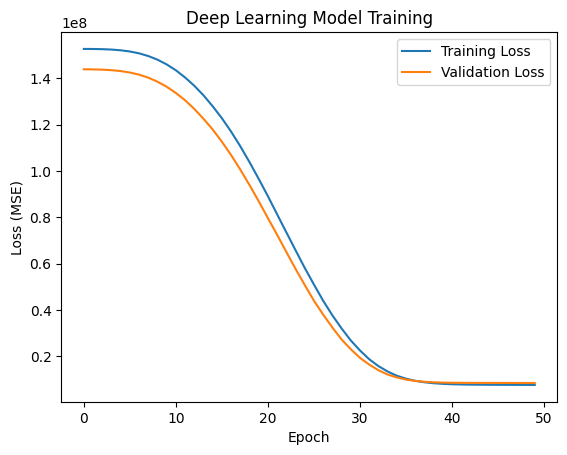

In [93]:
# prompt: Predicting LTV with Deep Learning

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assuming 'rfm' DataFrame is already prepared with 'Cluster', 'Frequency', 'Recency', and 'Monetary' columns

# Prepare data for Deep Learning
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

# Make predictions on the test set
y_pred = model.predict(X_test)

# You can further analyze the results, plot the predicted vs. actual values, and calculate other metrics
# like R-squared, RMSE, etc.

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Deep Learning Model Training')
plt.show()

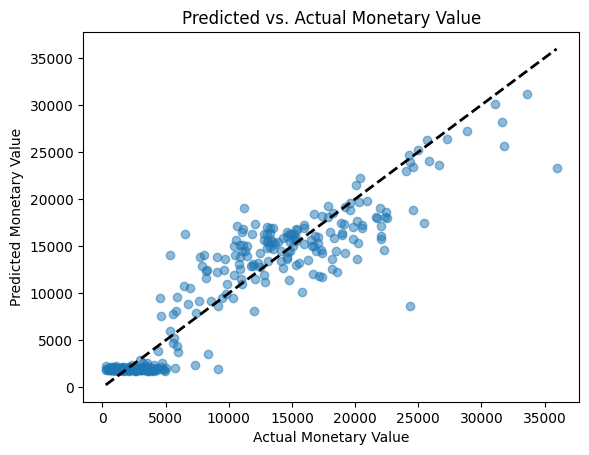

In [95]:
# prompt: plot the predicted vs. actual values to visualize the model's performance

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("Predicted vs. Actual Monetary Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 162261840.0000 - mae: 9614.3535 - val_loss: 143889136.0000 - val_mae: 9126.3682
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149003568.0000 - mae: 9198.0527 - val_loss: 143830672.0000 - val_mae: 9123.9688
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 152865792.0000 - mae: 9235.6992 - val_loss: 143690560.0000 - val_mae: 9118.2119
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145963056.0000 - mae: 8976.8838 - val_loss: 143395952.0000 - val_mae: 9106.5723
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 151995664.0000 - mae: 9222.5029 - val_loss: 142858512.0000 - val_mae: 9085.9316
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144978432.0000 - mae: 9062.1025 - val_loss: 142011408.0000 - val_mae: 9053.9590
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151308160.0000 - mae: 9308.0654 - val_loss: 140765696.0000 - val_mae: 9007.5996
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━

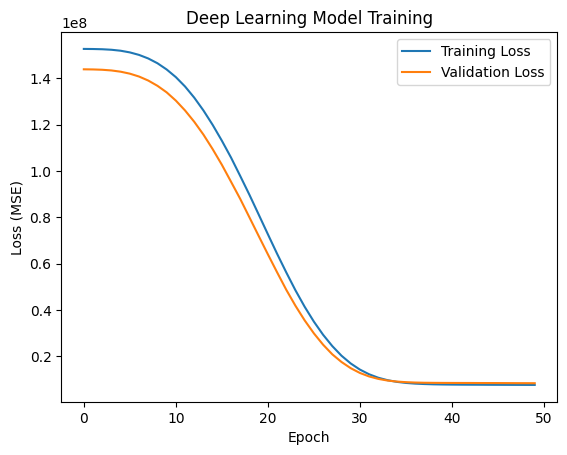

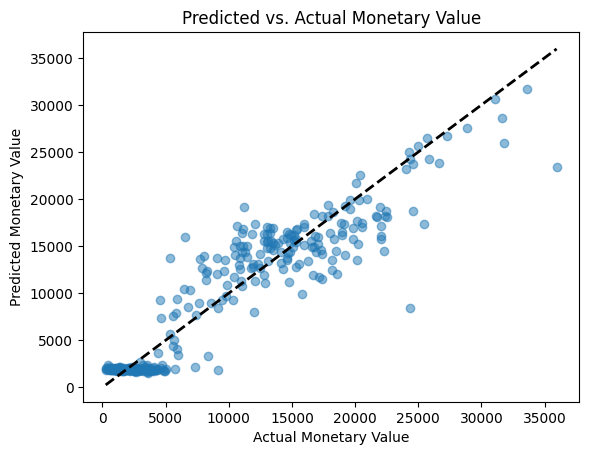

In [96]:
# prompt: predicting LTV with  Keras

# Assuming 'rfm' DataFrame is already prepared with 'Cluster', 'Frequency', 'Recency', and 'Monetary' columns

# Prepare data for Deep Learning
X = rfm[['Frequency', 'Recency', 'Cluster']]  # Features
y = rfm['Monetary']  # Target variable (LTV)

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

# Make predictions on the test set
y_pred = model.predict(X_test)

# You can further analyze the results, plot the predicted vs. actual values, and calculate other metrics
# like R-squared, RMSE, etc.

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Deep Learning Model Training')
plt.show()

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("Predicted vs. Actual Monetary Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.show()

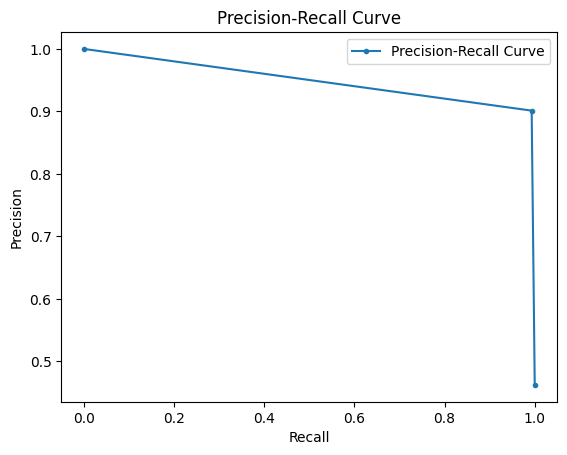

In [99]:
# prompt: use the precision_recall_curve() function to compute precision and recall

from sklearn.metrics import precision_recall_curve

# Assuming y_test contains the true labels and y_pred contains the predicted probabilities
# You need to adjust this based on how your model generates predictions.

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_binary)

# You can now plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()